##LSTM model

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM

In [3]:
df = pd.read_csv("../data/BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-10,4776.209961,4922.169922,4765.100098,4781.990234,4781.990234,1597139968
1,2017-10-11,4789.250000,4873.729980,4751.629883,4826.479980,4826.479980,1222279936
2,2017-10-12,4829.580078,5446.910156,4822.000000,5446.910156,5446.910156,2791610112
3,2017-10-13,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3615480064
4,2017-10-14,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1669030016


### Visualization

In [4]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1822,False,False,False,False,False,False,False
1823,False,False,False,False,False,False,False
1824,False,False,False,False,False,False,False
1825,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.describe

<bound method NDFrame.describe of             Date          Open          High           Low         Close  \
0     2017-10-10   4776.209961   4922.169922   4765.100098   4781.990234   
1     2017-10-11   4789.250000   4873.729980   4751.629883   4826.479980   
2     2017-10-12   4829.580078   5446.910156   4822.000000   5446.910156   
3     2017-10-13   5464.160156   5840.299805   5436.850098   5647.209961   
4     2017-10-14   5643.529785   5837.700195   5591.640137   5831.790039   
...          ...           ...           ...           ...           ...   
1822  2022-10-06  20161.039063  20408.392578  19900.087891  19955.443359   
1823  2022-10-07  19957.558594  20041.085938  19395.792969  19546.849609   
1824  2022-10-08  19546.328125  19601.695313  19299.414063  19416.568359   
1825  2022-10-09  19417.478516  19542.539063  19349.259766  19446.425781   
1826  2022-10-10  19437.414063  19512.427734  19152.566406  19320.189453   

         Adj Close       Volume  
0      4781.990234 

In [8]:
df["Close"]=pd.to_numeric(df.Close,errors='coerce')

#### plots

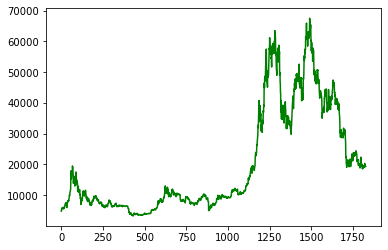

In [9]:
# 'Close' feature  
plt.plot(df.index, df['Close'], color = 'green', label = 'Close')
plt.show()

#### Preprocessing

In [10]:
# saving 'Close' feature in a variable name dataV1, since we only need that
dataV1 = df.iloc[:,3:4]
dataV1 = dataV1.values
dataV1.shape

(1827, 1)

In [11]:
# normalizing the data
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)
dataV1.shape

(1827, 1)

In [12]:
# declaring feature length
feature_length = 100
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

In [13]:
X_train, y_train = Create_Features_and_Targets(dataV1, feature_length)

In [14]:
# Making data 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [15]:
X_train.shape, y_train.shape

((1726, 100, 1), (1726,))

### Model

In [16]:
# model
model = Sequential([
    LSTM(100, return_sequences = True, input_shape =(X_train.shape[1],1)),
    Dropout(0.3),

    LSTM(100, return_sequences = False),
    Dropout(0.3),
    Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Training the model
history = model.fit(
    X_train, 
    y_train, 
    epochs = 10, 
    batch_size = 12, 
    verbose=1,
)

Epoch 1/10
144/144 [==============================] - 21s 111ms/step - loss: 0.0065
Epoch 2/10
144/144 [==============================] - 17s 117ms/step - loss: 0.0028
Epoch 3/10
144/144 [==============================] - 16s 113ms/step - loss: 0.0027
Epoch 4/10
144/144 [==============================] - 17s 115ms/step - loss: 0.0020
Epoch 5/10
144/144 [==============================] - 16s 114ms/step - loss: 0.0023
Epoch 6/10
144/144 [==============================] - 16s 114ms/step - loss: 0.0020
Epoch 7/10
144/144 [==============================] - 16s 114ms/step - loss: 0.0019
Epoch 8/10
144/144 [==============================] - 17s 120ms/step - loss: 0.0016
Epoch 9/10
144/144 [==============================] - 18s 122ms/step - loss: 0.0014
Epoch 10/10
144/144 [==============================] - 18s 124ms/step - loss: 0.0017


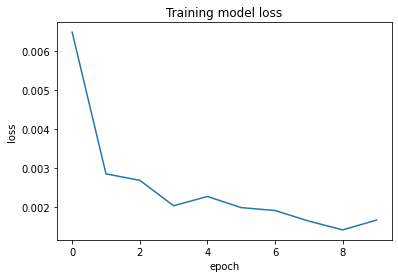

In [19]:
# training model
plt.plot(history.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [20]:
testData = df.iloc[:,3:4] 
y_real = testData.iloc[feature_length+1:,0:].values 
x_test = testData.iloc[:,0:].values  
y_real.shape, x_test.shape

((1726, 1), (1827, 1))

In [21]:
# normalize
x_test = Scaler.transform(x_test)
x_test.shape

(1827, 1)

In [22]:
x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 
x_test.shape

(1726, 100, 1)

In [23]:
# making predictions
y_pred = model.predict(x_test)

54/54 [==============================] - 3s 44ms/step


In [24]:
predicted_price = Scaler.inverse_transform(y_pred)

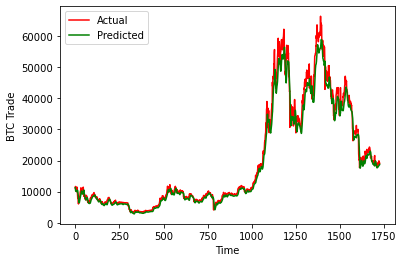

In [39]:
#Actual Stock Price and the Predicted Stock Price
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')

plt.xlabel('Time')
plt.ylabel('BTC Trade')
plt.legend()
plt.show()

============//===================